# TASK 2: TO EXPLORE SUPERVISED MACHINE LEARNING 

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [27]:
# importing all the libraries required for this notebook

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
#importing data from link given

url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)
print("DATA IMPORTED SUCCESSFULLY")

DATA IMPORTED SUCCESSFULLY


In [29]:
dataset.shape

(25, 2)

In [30]:
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [31]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [32]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

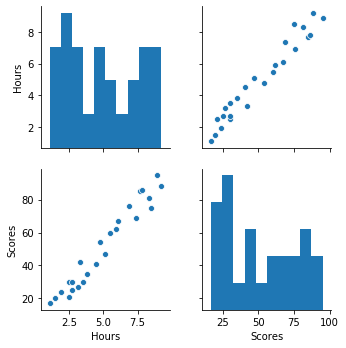

In [33]:
#plotting the pairplot
sns.pairplot(dataset)

In [34]:
dataset_corr = dataset.corr()

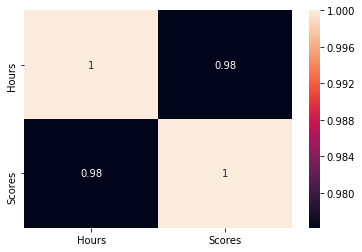

In [35]:
sns.heatmap(dataset_corr,annot=True)

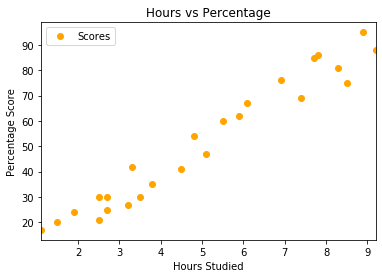

In [36]:
#plotting the distribution of scores
dataset.plot(x='Hours',y='Scores',style ='o',c='orange')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

# Finding data

In [37]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values

# Splitting the data into training and test sets by using train_test_split() imported from sklearn

In [38]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model Training

In [39]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 

print("Training completed.")

Training completed.


In [40]:
print(reg.intercept_)

2.018160041434683


In [41]:
print(reg.coef_)

[9.91065648]


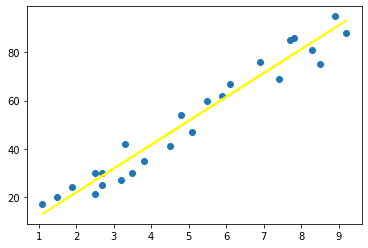

In [42]:
#plotting regression line
line = reg.coef_*X+reg.intercept_

plt.scatter(X,y)
plt.plot(X, line, c='yellow')
plt.show()

# Predicting scores based on test hours

In [43]:
y_predict = reg.predict(X_test)
y_predict

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

Text(0, 0.5, 'Percentage score')

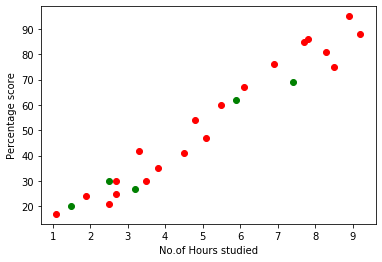

In [44]:
plt.scatter(X_train,y_train,color='red')
plt.scatter(X_test,y_test,color='green')
plt.xlabel('No.of Hours studied')
plt.ylabel('Percentage score')

Text(0, 0.5, 'Percentage score')

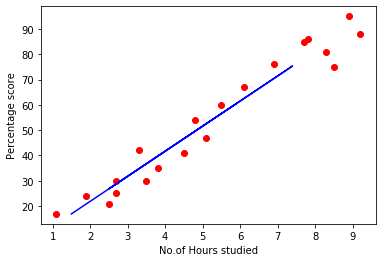

In [45]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_test,y_predict,color='blue')
plt.xlabel('No.of Hours studied')
plt.ylabel('Percentage score')

# Comparing predicted vs actual value

In [46]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Predicting score when studying hours are 9.25 

In [47]:
hours = 9.25
pred = reg.predict([[hours]])
print('No.of Hours =',hours)
print('Predicted Score =',pred[0])

No.of Hours = 9.25
Predicted Score = 93.69173248737538


# Evaluating Model

In [48]:
from sklearn import metrics  
print('Mean Absolute Error:',  metrics.mean_absolute_error(y_test, y_predict)) 
print('Mean Squared Error:',  metrics.mean_squared_error(y_test, y_predict)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict))) 

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
